In [21]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from subprocess import PIPE, Popen

In [271]:
# Lenght_x         = 0.01 #cetnimeters
# Lenght_y         = 0.01 #cetnimeters
# Dimension        = 500
# ParticlesNumbers = 2
# EFS_OutputFile   = "outputfile1.txt"
# EFP_OutputFile   = "outputfile2.txt"
# with open('InputFile.txt', 'w+') as write:
#     s = "Substrate:\n\tLenght_x = "+ str(Lenght_x)+"\n\tLenght_y = " + str(Lenght_y)
#     write.write(s)
#     s = "\nParameters of calculation:\n\tDimenstion = " + str(Dimension)
#     write.write(s)
#     s = "\nOther parameters:\n\tNumber of electrons = " + str(ParticlesNumbers)
#     write.write(s)
#     s = "\nName of output files:\n\tOutput EFS-files: " + EFS_OutputFile
#     write.write(s)
#     s = "\n\tOutput EFP-files: " + EFP_OutputFile
#     write.write(s)

In [262]:
# !cat InputFile.txt

Substrate:
	Lenght_x = 0.01
	Lenght_y = 0.1
Parameters of calculation:
	Dimenstion = 500
Other parameters:
	Number of electrons = 33
Name of output files:
	Output EFS-files: outputfile1.txt
	Output EFP-files: outputfile2.txt

In [244]:
cmd = 'g++ main.cpp CHR_PRP.cpp SUB_PRP.cpp FUNC.cpp -c -std=c++14'
subprocess.Popen(cmd, shell=True)

In [245]:
cmd = 'g++ main.o CHR_PRP.o SUB_PRP.o FUNC.o -o DoIt'
subprocess.Popen(cmd, shell=True)

In [272]:
cmd = './DoIt'
subprocess.Popen(cmd, shell=True)

<IPython.core.display.Javascript object>


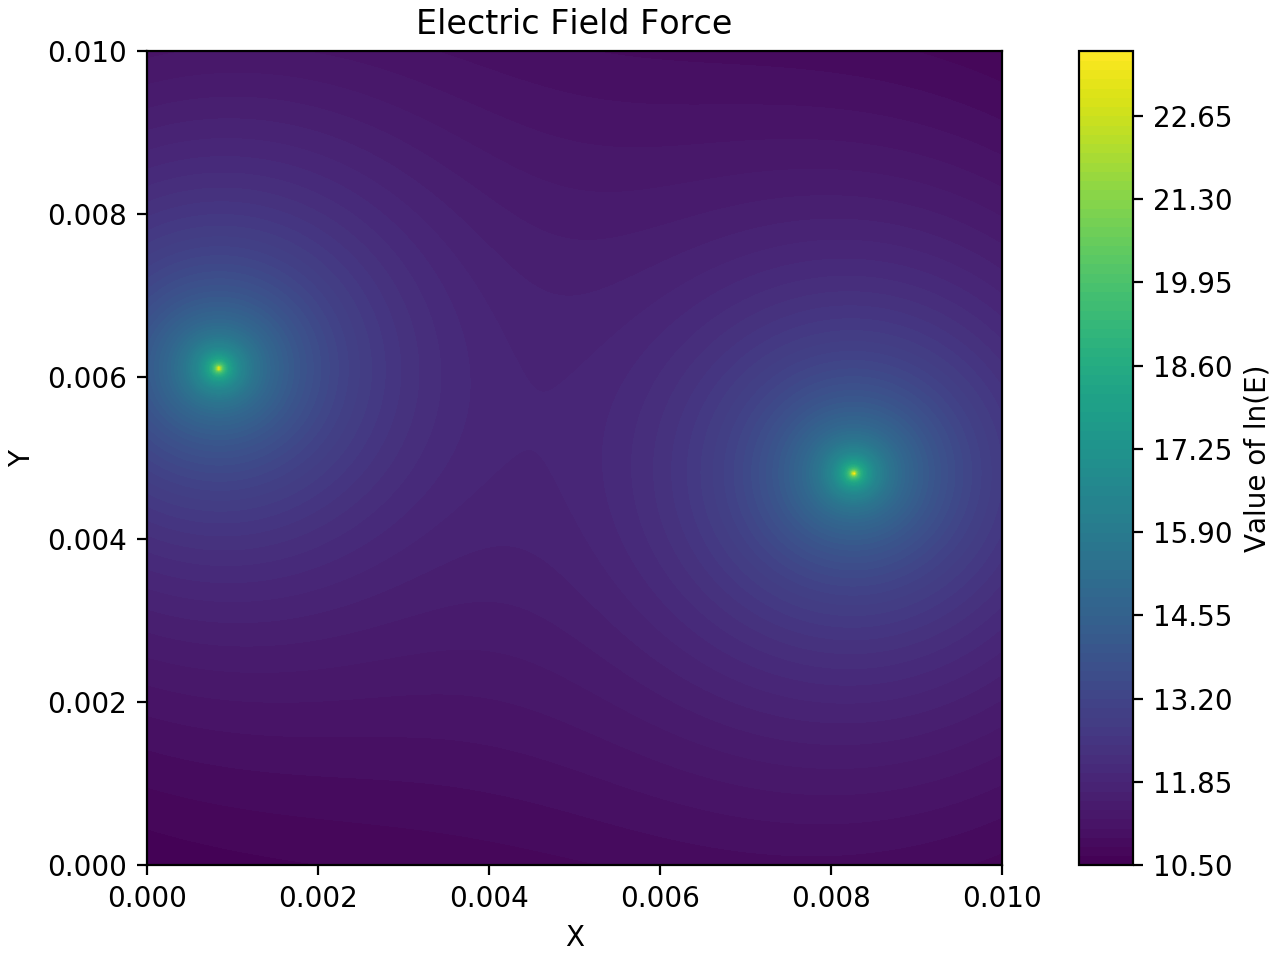

Text(0, 0.5, 'Value of ln(E)')

In [273]:
with open(EFS_OutputFile) as read:
    read.readline()
    a = read.readline()
    a = a.split()
    lenght_x = float(a[2])
    a = read.readline()
    a = a.split()
    lenght_y = float(a[2])
    a = read.readline()
    a = a.split()
    dimensional = int(a[2])
    read.readline()
    a = read.readline()
    a = a.split()
    position_x = float(a[2])
    a = read.readline()
    a = a.split()
    position_y = float(a[2])
    a = read.readline()
    a = a.split()
    charge_value = float(a[2])
    
    for line in read:
        if line == "Data:\n":
            a = read.readline()

a = a.split()

data = np.zeros((dimensional, dimensional), float)

for i, value in enumerate(a):
    a[i] = float(value)

i = 0
j = 0
for k, value in enumerate(a):
    i = int(k%dimensional)
    j = int(k/dimensional)
    data[i][j] = float(value)


X = np.linspace(0, lenght_x, dimensional)
Y = np.linspace(0, lenght_y, dimensional)


fig, ax = plt.subplots(constrained_layout = True)
ax.set_title('Electric Field Force')
CS = ax.contourf(X,Y, np.log(data), 100, origin = 'lower')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Value of ln(E)')

<IPython.core.display.Javascript object>


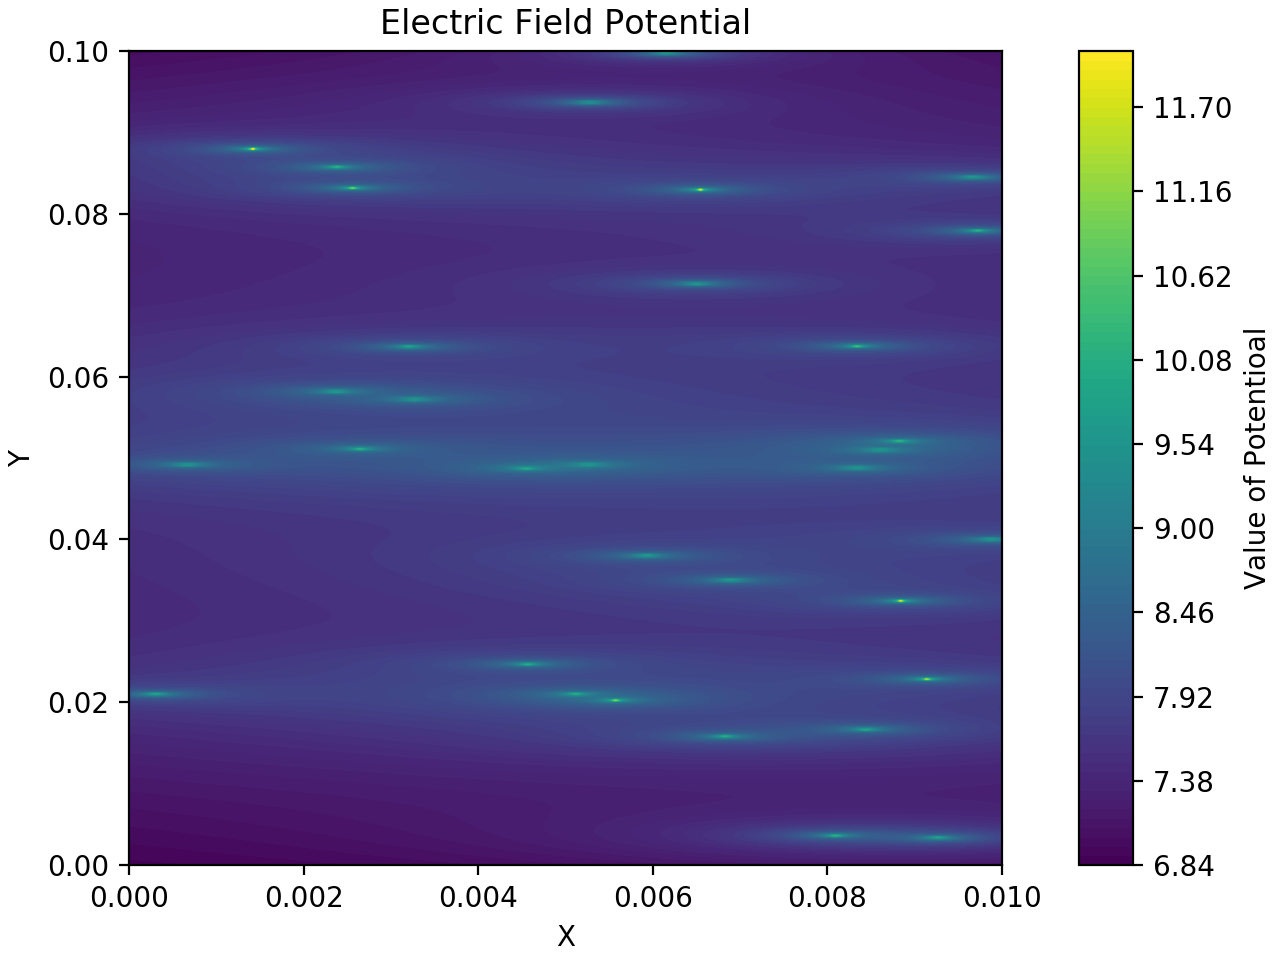

Text(0, 0.5, 'Value of Potentioal')

In [274]:
with open("output2.txt") as read:
    read.readline()
    a = read.readline()
    a = a.split()
    lenght_x = float(a[2])
    a = read.readline()
    a = a.split()
    lenght_y = float(a[2])
    a = read.readline()
    a = a.split()
    dimensional = int(a[2])
    read.readline()
    a = read.readline()
    a = a.split()
    position_x = float(a[2])
    a = read.readline()
    a = a.split()
    position_y = float(a[2])
    a = read.readline()
    a = a.split()
    charge_value = float(a[2])
    
    for line in read:
        if line == "Data:\n":
            a = read.readline()

a = a.split()

data = np.zeros((dimensional, dimensional), float)

for i, value in enumerate(a):
    a[i] = float(value)

i = 0
j = 0
for k, value in enumerate(a):
    i = int(k%dimensional)
    j = int(k/dimensional)
    data[i][j] = float(value)


X = np.linspace(0, lenght_x, dimensional)
Y = np.linspace(0, lenght_y, dimensional)


fig, ax = plt.subplots(constrained_layout = True)
ax.set_title('Electric Field Potential')
CS = ax.contourf(X,Y, np.log(data), 100, origin = 'lower')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Value of Potentioal')

Substrate:
	Lenght_x = 5.0
	Lenght_y = 5.0
Parameters of calculation:
	Dimenstion = 5000
Other parameters:
	Number of electrons = 10